In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import shap

In [13]:
%matplotlib inline

In [14]:
df = pd.read_csv("CustomerChurn.csv")
df = df.drop(columns=['customerID'], errors='ignore')
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True)

In [15]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [16]:
def profit_category(row):
    if row['MonthlyCharges'] >= 80:
        return 'High'
    elif row['MonthlyCharges'] >= 50:
        return 'Medium'
    else:
        return 'Low'
df['ProfitSegment'] = df.apply(profit_category, axis=1)


In [17]:
df_encoded = pd.get_dummies(df, drop_first=True)

In [18]:
X = df_encoded.drop('Churn_Yes', axis=1)
y = df_encoded['Churn_Yes']
X = X.drop([col for col in X.columns if 'ProfitSegment' in col], axis=1)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

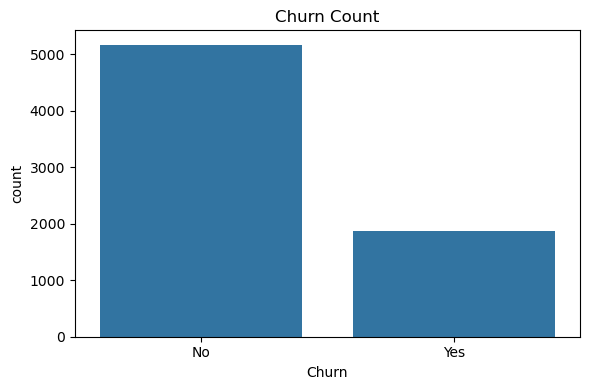

In [21]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df)
plt.title("Churn Count")
plt.tight_layout()
plt.show()

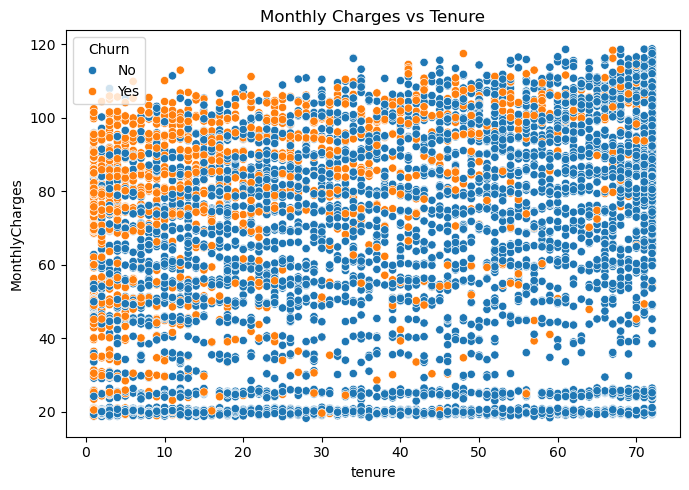

In [22]:
plt.figure(figsize=(7, 5))
sns.scatterplot(x='tenure', y='MonthlyCharges', hue='Churn', data=df)
plt.title("Monthly Charges vs Tenure")
plt.tight_layout()
plt.show()


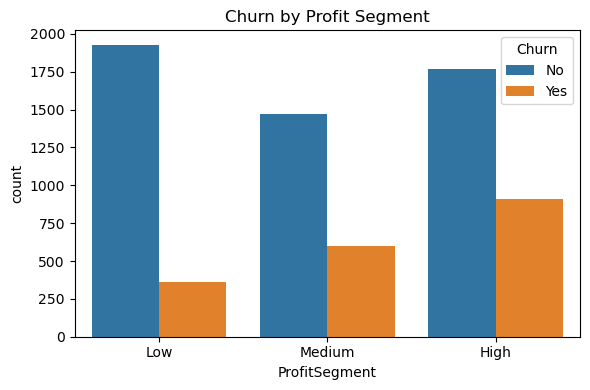

In [23]:
plt.figure(figsize=(6, 4))
sns.countplot(x='ProfitSegment', hue='Churn', data=df)
plt.title("Churn by Profit Segment")
plt.tight_layout()
plt.show()